In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

### point estimate

In [2]:
np.random.seed(2016)
salary_1 = stats.poisson.rvs(mu=3500, size=150000)
salary_2 = stats.poisson.rvs(mu=2000, size=100000)
salary_all = np.concatenate((salary_1,salary_2))
salary_all.mean()

2900.0457999999999

In [3]:
np.random.seed(2016)
sample_salary = np.random.choice(a= salary_all, size=500)
print( sample_salary.mean() )
salary_all.mean() - sample_salary.mean()

2812.608


87.437799999999697

In [4]:
random.seed(10)
population_occupation = (["doctor"]*100000) + \
                        (["teacher"]*50000) +\
                        (["farmer"]*50000) + \
                        (["engineer"]*25000) +\
                        (["other"]*25000)
demo_sample = random.sample(population_occupation, 1000) 
for occupation in set(demo_sample):
    print( occupation + " proportion estimate:" )
    print( demo_sample.count(occupation)/1000 )
    print( occupation + " population :" )
    print( population_occupation.count(occupation)/250000 )

teacher proportion estimate:
0.231
teacher population :
0.2
doctor proportion estimate:
0.379
doctor population :
0.4
engineer proportion estimate:
0.099
engineer population :
0.1
farmer proportion estimate:
0.192
farmer population :
0.2
other proportion estimate:
0.099
other population :
0.1


### 中心极限定理

sampling distribution符合正态分布

-0.40093032100832643


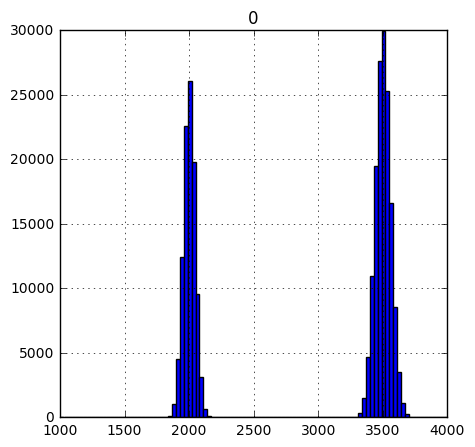

In [5]:
pd.DataFrame(salary_all).hist(bins=100,range=(1000,4000),figsize=(5,5))

print( stats.skew(salary_all) )

-0.1646652248094664


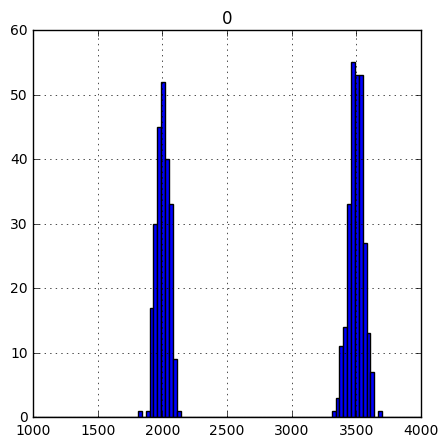

In [6]:
pd.DataFrame(sample_salary).hist(bins=100, range=(1000,4000), figsize=(5,5))
print( stats.skew(sample_salary) )

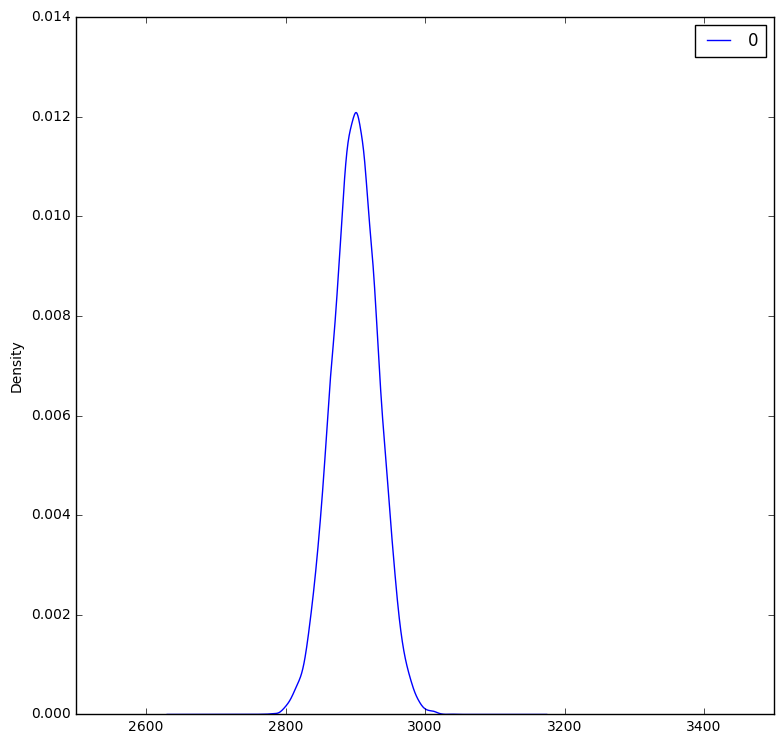

In [7]:
np.random.seed(2016)

point_estimates = []

for x in range(20000):
    sample = np.random.choice(a= salary_all, size=500)
    point_estimates.append( sample.mean() )
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(2500,3500))   

In [13]:
salary_all.mean() - np.array(point_estimates).mean()

0.24732259999973394

### 置信区间

https://en.wikipedia.org/wiki/Confidence_interval

$$z*\frac{\sigma}{\sqrt n}$$

In [10]:
np.random.seed(2016)
sample_size = 1000
sample = np.random.choice(a= salary_all, size = sample_size)
sample_mean = sample.mean()
z_critical = stats.norm.ppf(q = 0.975)
print("z-critical value:")
print(z_critical)
pop_stdev = salary_all.std()
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.95996398454
Confidence interval:
(2833.9102614384133, 2925.2317385615866)


In [11]:
np.random.seed(2016)
sample_size = 1000
intervals = []
sample_means = []
for sample in range(25):
    sample = np.random.choice(a= salary_all, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    z_critical = stats.norm.ppf(q = 0.975)
    pop_stdev = salary_all.std()
    stats.norm.ppf(q = 0.025)
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    intervals.append(confidence_interval)

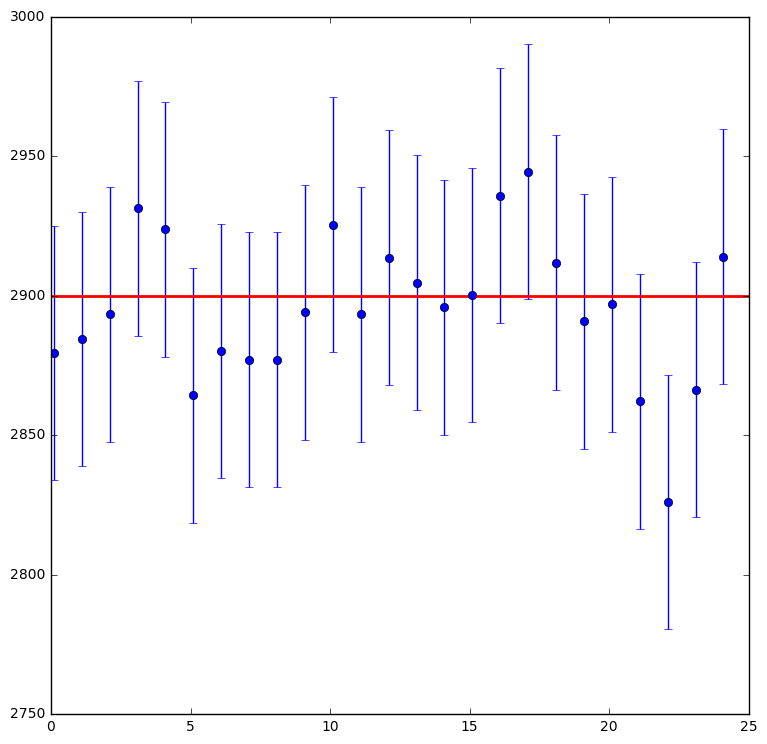

In [12]:
plt.figure(figsize=(9,9))
plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals], fmt='o')
plt.hlines(xmin=0, xmax=25, y=salary_all.mean(), linewidth=2.0, color="red")

In [18]:
np.random.seed(10)
sample_size = 25
sample = np.random.choice(a= salary_all, size = sample_size)
sample_mean = sample.mean()
t_critical = stats.t.ppf(q = 0.975, df=24)
print("t-critical value:")
print(t_critical)
sample_stdev = sample.std()
# sample standard deviation 
sigma = sample_stdev/math.sqrt(sample_size)
# Standard deviation estimate 
margin_of_error = t_critical * sigma 
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("Confidence interval:")
print(confidence_interval)

t-critical value:
2.06389856163
Confidence interval:
(2681.6248021759825, 3296.5351978240174)


In [15]:
# Check the difference between critical values with a sample size of 1000 
stats.t.ppf(q=0.975, df= 999) - stats.norm.ppf(0.975)

0.0023774765933946007

In [21]:
stats.t.interval(alpha = 0.95, # Confidence level 
                 df= 24, # Degrees of freedom 
                 loc = sample_mean, # Sample mean 
                 scale = sigma)

(2681.6248021759825, 3296.5351978240174)

$$z*\sqrt{\frac{p(p-1)}{n}}$$

In [22]:
z_critical = stats.norm.ppf(0.975) # Record z-critical value 
p = 0.192 # Point estimate of proportion 
n = 1000 # Sample size 
margin_of_error = z_critical * math.sqrt((p*(1-p))/n) 
confidence_interval = (p - margin_of_error, # Calculate the the interval 
                       p + margin_of_error) 
confidence_interval

(0.16758794241348748, 0.21641205758651252)

In [23]:
stats.norm.interval(alpha = 0.95, # Confidence level 
                    loc = 0.192, # Point estimate of proportion 
                    scale = math.sqrt((p*(1-p))/n)) # Scaling factor

(0.16758794241348748, 0.21641205758651252)